# Tugas Praktikum 12
## Temu Kembali Informasi (KOM431)
### Irfan Alghani Khalid (G64170054) | Julius Christoper Siswanto (G64170097)

# Import Libraries

In [7]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from PIL import Image
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

# LBP (n_points=8, radius=2)

## Feature Extraction for Image Database

In [47]:
features = []
for i in tqdm(os.listdir('./static/img')):
    img = Image.open('./static/img/' + i) 
    img = img.resize((224, 224))
    img = np.array(img)
    img = rgb2gray(img)
    lbp = local_binary_pattern(img, 8 * 2, 2, 'uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    features.append(hist)
features = np.array(features)
features.shape

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4738/4738 [03:59<00:00, 19.80it/s]


(4738, 18)

In [55]:
img_paths = []
for feature_path in Path("./static/img").glob("*.jpg"):
    img_paths.append(Path("./static/img") / (feature_path.stem + ".jpg"))

## Distance Measure Using Chi-Squared

In [81]:
def chisqr(A, B):
    chi = []
    for a in A:
        value = 0.5 * np.sum([((a - B) ** 2) / (a + B)]) 
        chi.append(value)
    chi = np.array(chi)
    return chi

## Retrieving Images

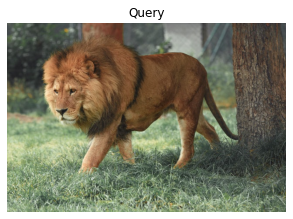

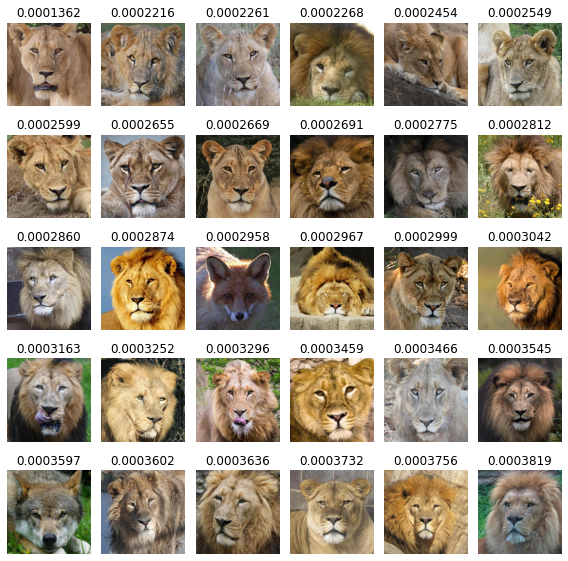

In [82]:
# Insert the image query
img = Image.open("./static/query/2.jpg")

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Image preprocessing
img = img.resize((224, 224))
img = np.array(img)
img = rgb2gray(img)

# Extract its features
lbp = local_binary_pattern(img, 8 * 2, 2, 'uniform')
n_bins = int(lbp.max() + 1)
query, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))

# Calculate the similarity (distance) between images
dists = chisqr(features, query)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title = '%.7f'%(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

# LBP (n_points=16, radius=2)

In [85]:
features = []
for i in tqdm(os.listdir('./static/img')):
    img = Image.open('./static/img/' + i) 
    img = img.resize((224, 224))
    img = np.array(img)
    img = rgb2gray(img)
    lbp = local_binary_pattern(img, 16 * 2, 2, 'uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    features.append(hist)
features = np.array(features)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4738/4738 [04:46<00:00, 16.52it/s]


In [86]:
img_paths = []
for feature_path in Path("./static/img").glob("*.jpg"):
    img_paths.append(Path("./static/img") / (feature_path.stem + ".jpg"))

In [87]:
def chisqr(A, B):
    chi = []
    for a in A:
        value = 0.5 * np.sum([((a - B) ** 2) / (a + B)]) 
        chi.append(value)
    chi = np.array(chi)
    return chi

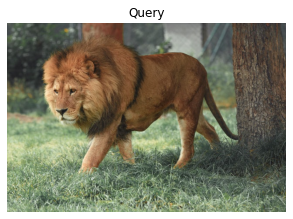

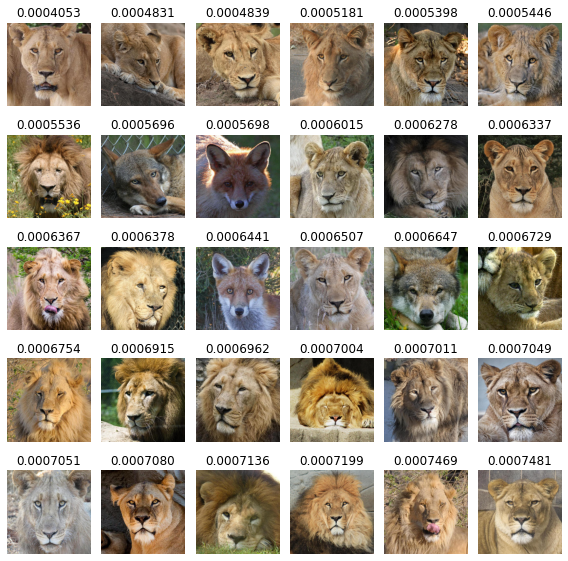

In [88]:
# Insert the image query
img = Image.open("./static/query/2.jpg")

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Image preprocessing
img = img.resize((224, 224))
img = np.array(img)
img = rgb2gray(img)

# Extract its features
lbp = local_binary_pattern(img, 16 * 2, 2, 'uniform')
n_bins = int(lbp.max() + 1)
query, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))

# Calculate the similarity (distance) between images
dists = chisqr(features, query)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title = '%.7f'%(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

# LBP (n_points=4, radius=1)

In [94]:
features = []
for i in tqdm(os.listdir('./static/img')):
    img = Image.open('./static/img/' + i) 
    img = img.resize((224, 224))
    img = np.array(img)
    img = rgb2gray(img)
    lbp = local_binary_pattern(img, 4 * 1, 1, 'uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    features.append(hist)
features = np.array(features)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4738/4738 [01:06<00:00, 70.78it/s]


In [95]:
img_paths = []
for feature_path in Path("./static/img").glob("*.jpg"):
    img_paths.append(Path("./static/img") / (feature_path.stem + ".jpg"))

In [96]:
def chisqr(A, B):
    chi = []
    for a in A:
        value = 0.5 * np.sum([((a - B) ** 2) / (a + B)]) 
        chi.append(value)
    chi = np.array(chi)
    return chi

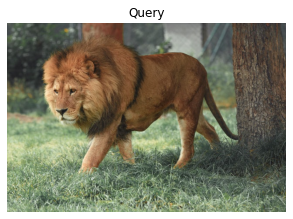

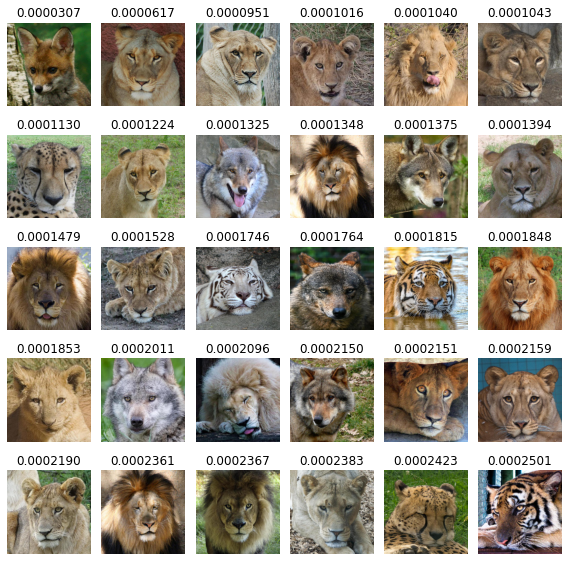

In [97]:
# Insert the image query
img = Image.open("./static/query/2.jpg")

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Image preprocessing
img = img.resize((224, 224))
img = np.array(img)
img = rgb2gray(img)

# Extract its features
lbp = local_binary_pattern(img, 4 * 1, 1, 'uniform')
n_bins = int(lbp.max() + 1)
query, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))

# Calculate the similarity (distance) between images
dists = chisqr(features, query)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title = '%.7f'%(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

# LBP (n_points=8, radius=1)

In [89]:
features = []
for i in tqdm(os.listdir('./static/img')):
    img = Image.open('./static/img/' + i) 
    img = img.resize((224, 224))
    img = np.array(img)
    img = rgb2gray(img)
    lbp = local_binary_pattern(img, 8 * 1, 1, 'uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    features.append(hist)
features = np.array(features)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4738/4738 [01:35<00:00, 49.65it/s]


In [90]:
img_paths = []
for feature_path in Path("./static/img").glob("*.jpg"):
    img_paths.append(Path("./static/img") / (feature_path.stem + ".jpg"))

In [91]:
def chisqr(A, B):
    chi = []
    for a in A:
        value = 0.5 * np.sum([((a - B) ** 2) / (a + B)]) 
        chi.append(value)
    chi = np.array(chi)
    return chi

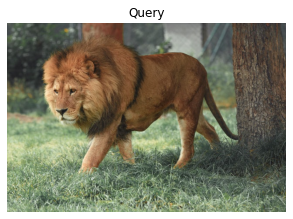

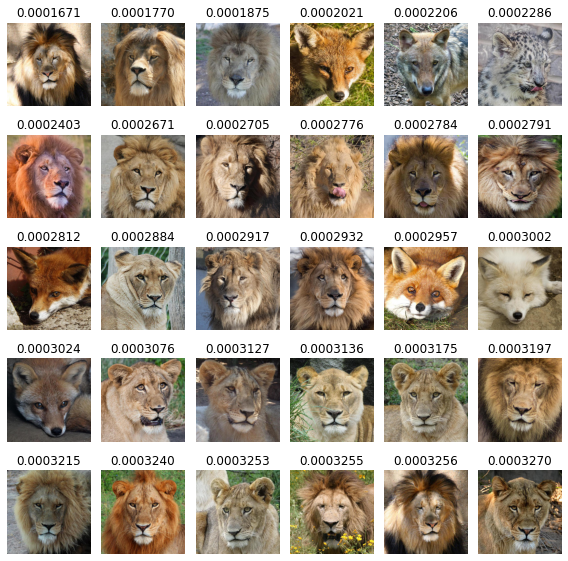

In [92]:
# Insert the image query
img = Image.open("./static/query/2.jpg")

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Image preprocessing
img = img.resize((224, 224))
img = np.array(img)
img = rgb2gray(img)

# Extract its features
lbp = local_binary_pattern(img, 8 * 1, 1, 'uniform')
n_bins = int(lbp.max() + 1)
query, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))

# Calculate the similarity (distance) between images
dists = chisqr(features, query)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title = '%.7f'%(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()